In [1]:
import reciprocalspaceship as rs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import gemmi as gm
import seaborn as sns
import re

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none',
    "font.size" : 18,
    #"font.family" : "sans-serif",
    #"font.sans-serif" : ["Nimbus Sans"],
}
plt.rcParams.update(new_rc_params)
directory_search_pattern = "careless_runs/" #directory in which to search for tabular outputs. 

This notebook is for calculating, compiling, and visualizing merging statistics. 

In [2]:
def get_careless_params(dirpath):
#     print(os.path.join(dirpath, 'inputs_params.log'))
    with open(os.path.join(dirpath, 'inputs_params.log')) as params:
        line = params.readline()
        nf_mtz = line.split(' ')[2]
        print(nf_mtz)
        print(re.split("_|\.", nf_mtz)[-2])
        line = params.readline()
        args_list=line.split('--')
#             print(args_list)
        p_={}
        bDisableImageScale=False
        for tag in args_list:
            if 'dmin' in tag:
                p_['DMIN']=tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-frequencies' in tag:
                p_['PEF'] =tag.split('=')[1].split(' ')[0]
            if 'iterations' in tag:
                p_['ITER']=tag.split('=')[1].split(' ')[0]
            if 'mlp-layers' in tag:
                p_['MLPL']=tag.split('=')[1].split(' ')[0]
            if 'studentt-likelihood-dof' in tag:
                p_['STDOF'] =tag.split('=')[1].split(' ')[0]
            if 'image-layers' in tag:
                p_['IL']  =tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-keys' in tag:
                p_['PE-keys']=tag.split('=')[1].split(' ')[0]
            if 'seed' in tag:
                p_['SEED']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-parents' in tag:
                p_['DW_list']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-r' in tag:
                DWr_list = tag.split('=')[1]
                p_['rDW']  = DWr_list.split(',')[-1]
            if 'disable-image-scales' in tag:
                bDisableImageScale=True
            if 'refine-uncertainties' in tag:
                p_['RU']=1
        if bDisableImageScale:
            p_['IL']=-1
        if 'STDOF' not in p_:
            p_['STDOF']=-1
        if 'RU' not in p_:
            p_['RU']=0
        if 'PEF' not in p_:
            p_['PEF']=0
        if 'rDW' not in p_:
            p_['rDW']=-1
        p_['NF'] = re.split("_|\.", nf_mtz)[-2][1:]
        run_param=pd.DataFrame(data=p_,index=[0])
        run_param.DMIN  = run_param.DMIN.astype( 'float')
        run_param.SEED  = run_param.SEED.astype( 'int64')
        run_param.ITER  = run_param.ITER.astype( 'int64')
        run_param.STDOF = run_param.STDOF.astype('float')
        run_param.RU    = run_param.RU.astype(   'int64')
        run_param.MLPL  = run_param.MLPL.astype( 'int64')
        run_param.IL    = run_param.IL.astype(   'int64')
        run_param.rDW   = run_param.rDW.astype(  'float')
        run_param.PEF   = run_param.PEF.astype(  'int64')
        run_param.NF    = run_param.NF.astype(   'int64')
        return run_param

In [3]:
!pwd

/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep


### Run scripts to calculate merging statistics

We calculate merging statistics with a set of scripts in `./scripts`.

In [56]:
%%bash

sh ./scripts/unfriedelize_all.sh merge_26*

./careless_runs/merge_26090291_28179_mono_cl3_mc1_grid_49


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090291_28179_mono_cl3_mc1_grid_49/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128124
Submitted batch job 26128134
./careless_runs/merge_26090296_21869_mono_cl3_mc1_grid_2


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090296_21869_mono_cl3_mc1_grid_2/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128136
Submitted batch job 26128137
./careless_runs/merge_26090297_9299_mono_cl3_mc1_grid_3


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090297_9299_mono_cl3_mc1_grid_3/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128138
Submitted batch job 26128139
./careless_runs/merge_26090298_11550_mono_cl3_mc1_grid_4


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090298_11550_mono_cl3_mc1_grid_4/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128140
Submitted batch job 26128141
./careless_runs/merge_26090299_32132_mono_cl3_mc1_grid_5


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090299_32132_mono_cl3_mc1_grid_5/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128143
Submitted batch job 26128144
./careless_runs/merge_26090300_20220_mono_cl3_mc1_grid_6


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090300_20220_mono_cl3_mc1_grid_6/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128146
Submitted batch job 26128147
./careless_runs/merge_26090301_20668_mono_cl3_mc1_grid_7


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090301_20668_mono_cl3_mc1_grid_7/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128148
Submitted batch job 26128149
./careless_runs/merge_26090302_6606_mono_cl3_mc1_grid_8


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090302_6606_mono_cl3_mc1_grid_8/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128151
Submitted batch job 26128154
./careless_runs/merge_26090303_8392_mono_cl3_mc1_grid_9


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090303_8392_mono_cl3_mc1_grid_9/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128158
Submitted batch job 26128159
./careless_runs/merge_26095517_27442_mono_cl3_mc1_grid_10


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095517_27442_mono_cl3_mc1_grid_10/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128161
Submitted batch job 26128162
./careless_runs/merge_26095519_5701_mono_cl3_mc1_grid_11


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095519_5701_mono_cl3_mc1_grid_11/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128164
Submitted batch job 26128165
./careless_runs/merge_26095520_23979_mono_cl3_mc1_grid_12


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095520_23979_mono_cl3_mc1_grid_12/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128177
Submitted batch job 26128179
./careless_runs/merge_26095526_3803_mono_cl3_mc1_grid_13


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095526_3803_mono_cl3_mc1_grid_13/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128190
Submitted batch job 26128193
./careless_runs/merge_26095529_15954_mono_cl3_mc1_grid_14


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095529_15954_mono_cl3_mc1_grid_14/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128199
Submitted batch job 26128200
./careless_runs/merge_26095530_3276_mono_cl3_mc1_grid_15


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095530_3276_mono_cl3_mc1_grid_15/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128204
Submitted batch job 26128205
./careless_runs/merge_26095531_29841_mono_cl3_mc1_grid_16


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095531_29841_mono_cl3_mc1_grid_16/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128208
Submitted batch job 26128210
./careless_runs/merge_26095532_25433_mono_cl3_mc1_grid_17


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26095532_25433_mono_cl3_mc1_grid_17/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128212
Submitted batch job 26128213
./careless_runs/merge_26100870_27943_mono_cl3_mc1_grid_18


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26100870_27943_mono_cl3_mc1_grid_18/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128216
Submitted batch job 26128218
./careless_runs/merge_26100872_5124_mono_cl3_mc1_grid_19


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26100872_5124_mono_cl3_mc1_grid_19/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128221
Submitted batch job 26128222
./careless_runs/merge_26100883_6242_mono_cl3_mc1_grid_20


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26100883_6242_mono_cl3_mc1_grid_20/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128230
Submitted batch job 26128231
./careless_runs/merge_26100999_14278_mono_cl3_mc1_grid_21


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26100999_14278_mono_cl3_mc1_grid_21/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128235
Submitted batch job 26128236
./careless_runs/merge_26101002_17441_mono_cl3_mc1_grid_22


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26101002_17441_mono_cl3_mc1_grid_22/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128238
Submitted batch job 26128239
./careless_runs/merge_26101003_31597_mono_cl3_mc1_grid_23


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26101003_31597_mono_cl3_mc1_grid_23/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128242
Submitted batch job 26128243
./careless_runs/merge_26101004_20382_mono_cl3_mc1_grid_24


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26101004_20382_mono_cl3_mc1_grid_24/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128255
Submitted batch job 26128256
./careless_runs/merge_26101005_24648_mono_cl3_mc1_grid_25


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26101005_24648_mono_cl3_mc1_grid_25/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128260
Submitted batch job 26128272
./careless_runs/merge_26102933_8933_mono_cl3_mc1_grid_26


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26102933_8933_mono_cl3_mc1_grid_26/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128282
Submitted batch job 26128283
./careless_runs/merge_26110650_27974_mono_cl3_mc1_grid_27


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110650_27974_mono_cl3_mc1_grid_27/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128286
Submitted batch job 26128287
./careless_runs/merge_26110652_21900_mono_cl3_mc1_grid_28


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110652_21900_mono_cl3_mc1_grid_28/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128289
Submitted batch job 26128290
./careless_runs/merge_26110653_13152_mono_cl3_mc1_grid_29


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110653_13152_mono_cl3_mc1_grid_29/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128291
Submitted batch job 26128292
./careless_runs/merge_26110675_5834_mono_cl3_mc1_grid_30


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110675_5834_mono_cl3_mc1_grid_30/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128294
Submitted batch job 26128295
./careless_runs/merge_26110676_15810_mono_cl3_mc1_grid_31


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110676_15810_mono_cl3_mc1_grid_31/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128296
Submitted batch job 26128297
./careless_runs/merge_26110677_6485_mono_cl3_mc1_grid_32


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110677_6485_mono_cl3_mc1_grid_32/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128300
Submitted batch job 26128301
./careless_runs/merge_26110678_29907_mono_cl3_mc1_grid_33


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110678_29907_mono_cl3_mc1_grid_33/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128302
Submitted batch job 26128303
./careless_runs/merge_26110679_26442_mono_cl3_mc1_grid_34


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110679_26442_mono_cl3_mc1_grid_34/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128305
Submitted batch job 26128306
./careless_runs/merge_26110853_9931_mono_cl3_mc1_grid_35


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26110853_9931_mono_cl3_mc1_grid_35/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128307
Submitted batch job 26128308
./careless_runs/merge_26115186_18849_mono_cl3_mc1_grid_36


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115186_18849_mono_cl3_mc1_grid_36/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128310
Submitted batch job 26128314
./careless_runs/merge_26115187_1406_mono_cl3_mc1_grid_37


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115187_1406_mono_cl3_mc1_grid_37/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128327
Submitted batch job 26128329
./careless_runs/merge_26115188_20858_mono_cl3_mc1_grid_38


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115188_20858_mono_cl3_mc1_grid_38/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128341
Submitted batch job 26128342
./careless_runs/merge_26115262_8046_mono_cl3_mc1_grid_39


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115262_8046_mono_cl3_mc1_grid_39/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128344
Submitted batch job 26128345
./careless_runs/merge_26115363_8302_mono_cl3_mc1_grid_40


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115363_8302_mono_cl3_mc1_grid_40/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128348
Submitted batch job 26128349
./careless_runs/merge_26115366_27899_mono_cl3_mc1_grid_41


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115366_27899_mono_cl3_mc1_grid_41/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128350
Submitted batch job 26128351
./careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_0.mtz: No such file or directory
Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mt

Submitted batch job 26128353
Submitted batch job 26128354
./careless_runs/merge_26115401_9680_mono_cl3_mc1_grid_42


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_9680_mono_cl3_mc1_grid_42/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128355
Submitted batch job 26128356
./careless_runs/merge_26115402_28288_mono_cl3_mc1_grid_43


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_28288_mono_cl3_mc1_grid_43/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128357
Submitted batch job 26128358
./careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_0.mtz: No such file or directory
Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz


Submitted batch job 26128359
Submitted batch job 26128360
./careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_0.mtz: No such file or directory
Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mt

Submitted batch job 26128361
Submitted batch job 26128362
./careless_runs/merge_26115427_11992_mono_cl3_mc1_grid_44


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11992_mono_cl3_mc1_grid_44/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128363
Submitted batch job 26128364
./careless_runs/merge_26116580_21881_mono_cl3_mc1_grid_45


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116580_21881_mono_cl3_mc1_grid_45/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128365
Submitted batch job 26128366
./careless_runs/merge_26116605_27157_mono_cl3_mc1_grid_46


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116605_27157_mono_cl3_mc1_grid_46/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128368
Submitted batch job 26128369
./careless_runs/merge_26116606_18104_mono_cl3_mc1_grid_47


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116606_18104_mono_cl3_mc1_grid_47/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128385
Submitted batch job 26128386
./careless_runs/merge_26116663_15376_mono_cl3_mc1_grid_48


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116663_15376_mono_cl3_mc1_grid_48/../../scripts/unfriedelize.py", line 15, in <module>
    plus = rs.read_mtz(parser.plus_mtz)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open thl_1p8A_grid_xval_0.mtz: No such file or directory


Submitted batch job 26128398
Submitted batch job 26128399


In [57]:
%%bash

sh ./scripts/run_ccs.sh merge_26*

./careless_runs/merge_26090291_28179_mono_cl3_mc1_grid_49
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090291_28179_mono_cl3_mc1_grid_49
4
./careless_runs/merge_26090296_21869_mono_cl3_mc1_grid_2
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090296_21869_mono_cl3_mc1_grid_2

./careless_runs/merge_26090297_9299_mono_cl3_mc1_grid_3
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090297_9299_mono_cl3_mc1_grid_3

./careless_runs/merge_26090298_11550_mono_cl3_mc1_grid_4
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090298_11550_mono_cl3_mc1_grid_4

./careless_runs/merge_26090299_32132_mono_cl3_mc1_grid_5
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26090299_32132_mono_cl3_mc1_grid_5

./careless_runs/merge_26090300_20220_mono_cl3_mc1_grid_6
/n/hekstra_lab/projects/dw-examples/thermolysin

Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42/../../scripts/anomalous_peak_heights.py", line 112, in <module>
    main()
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42/../../scripts/anomalous_peak_heights.py", line 103, in main
    anom_res, anom_peaks = get_anom_peak_heights(mtz_filename=sys.argv[1], pdb_filename=sys.argv[2], atom_list=sys.argv[3], weight_key=weight_key)
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_23552_mono_cl3_mc1_grid_42/../../scripts/anomalous_peak_heights.py", line 21, in get_anom_peak_heights
    mtz_file = rs.read_mtz(mtz_filename)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
 

./careless_runs/merge_26115401_9680_mono_cl3_mc1_grid_42
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115401_9680_mono_cl3_mc1_grid_42
4
./careless_runs/merge_26115402_28288_mono_cl3_mc1_grid_43
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_28288_mono_cl3_mc1_grid_43
4
./careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43
4


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43/../../scripts/anomalous_peak_heights.py", line 112, in <module>
    main()
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43/../../scripts/anomalous_peak_heights.py", line 103, in main
    anom_res, anom_peaks = get_anom_peak_heights(mtz_filename=sys.argv[1], pdb_filename=sys.argv[2], atom_list=sys.argv[3], weight_key=weight_key)
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115402_5560_mono_cl3_mc1_grid_43/../../scripts/anomalous_peak_heights.py", line 21, in get_anom_peak_heights
    mtz_file = rs.read_mtz(mtz_filename)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    

./careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44
4


Traceback (most recent call last):
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44/../../scripts/anomalous_peak_heights.py", line 112, in <module>
    main()
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44/../../scripts/anomalous_peak_heights.py", line 103, in main
    anom_res, anom_peaks = get_anom_peak_heights(mtz_filename=sys.argv[1], pdb_filename=sys.argv[2], atom_list=sys.argv[3], weight_key=weight_key)
  File "/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11673_mono_cl3_mc1_grid_44/../../scripts/anomalous_peak_heights.py", line 21, in get_anom_peak_heights
    mtz_file = rs.read_mtz(mtz_filename)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless_021/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
 

./careless_runs/merge_26115427_11992_mono_cl3_mc1_grid_44
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26115427_11992_mono_cl3_mc1_grid_44
4
./careless_runs/merge_26116580_21881_mono_cl3_mc1_grid_45
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116580_21881_mono_cl3_mc1_grid_45
4
./careless_runs/merge_26116605_27157_mono_cl3_mc1_grid_46
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116605_27157_mono_cl3_mc1_grid_46
4
./careless_runs/merge_26116606_18104_mono_cl3_mc1_grid_47
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116606_18104_mono_cl3_mc1_grid_47
4
./careless_runs/merge_26116663_15376_mono_cl3_mc1_grid_48
/n/hekstra_lab/projects/dw-examples/thermolysin_xfel_frames_sweep/careless_runs/merge_26116663_15376_mono_cl3_mc1_grid_48
4


### Importing $CC_\text{pred}$

We now import overall CCpred, CC1/2, CCanom, and peak height values.

In [24]:
count=0
results_list=[]
params_list=[]
id_list=[]


for dirpath, dirnames, filenames in os.walk("."):
    if ('ccpred_overall_careless.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'ccpred_overall_careless.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
        careless_params=get_careless_params(dirpath)
        careless_params["grid_id"]=tmp_id
        careless_params["job_id"]=job_id
        careless_params["seed"]=seed
        params_list.append(careless_params)

all_params =pd.concat(params_list)
all_results_ccpred=pd.concat(results_list)

ValueError: No objects to concatenate

### Importing $CC_\text{1/2}$

In [5]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('cchalf_overall.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'cchalf_overall.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_cchalf=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

### Importing $CC_\text{anom}$

In [6]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('ccanom_overall.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'ccanom_overall.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_ccanom=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

### Importing Zn peak height for each weighting scheme

We import the zinc peak height for each weighting scheme. 

In [4]:
params_list=[]
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        careless_params=get_careless_params(dirpath)
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
        careless_params["grid_id"]=tmp_id
        careless_params["job_id"]=job_id
        careless_params["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
        params_list.append(careless_params)
all_params =pd.concat(params_list)
all_results_peak_heights=pd.concat(results_list)

./careless_runs/merge_26110653_13152_mono_cl3_mc1_grid_29
../unmerged_mtzs/friedel_plus_n1580.mtz
n1580
Read-in values of grid_id: 29,  job_id: 26110653,  seed: 13152
./careless_runs/merge_26090298_11550_mono_cl3_mc1_grid_4
../unmerged_mtzs/friedel_plus_n1185.mtz
n1185
Read-in values of grid_id: 4,  job_id: 26090298,  seed: 11550
./careless_runs/merge_26090303_8392_mono_cl3_mc1_grid_9
../unmerged_mtzs/friedel_plus_n3160.mtz
n3160
Read-in values of grid_id: 9,  job_id: 26090303,  seed: 8392
./careless_runs/merge_26110652_21900_mono_cl3_mc1_grid_28
../unmerged_mtzs/friedel_plus_n1185.mtz
n1185
Read-in values of grid_id: 28,  job_id: 26110652,  seed: 21900
./careless_runs/merge_26095530_3276_mono_cl3_mc1_grid_15
../unmerged_mtzs/friedel_plus_n2370.mtz
n2370
Read-in values of grid_id: 15,  job_id: 26095530,  seed: 3276
./careless_runs/merge_26095531_29841_mono_cl3_mc1_grid_16
../unmerged_mtzs/friedel_plus_n2765.mtz
n2765
Read-in values of grid_id: 16,  job_id: 26095531,  seed: 29841
./care

In [5]:
all_results_peak_heights = all_params.drop(columns=["job_id","seed"]).merge(all_results_peak_heights.drop(columns=["job_id","seed"]), on=["grid_id"])


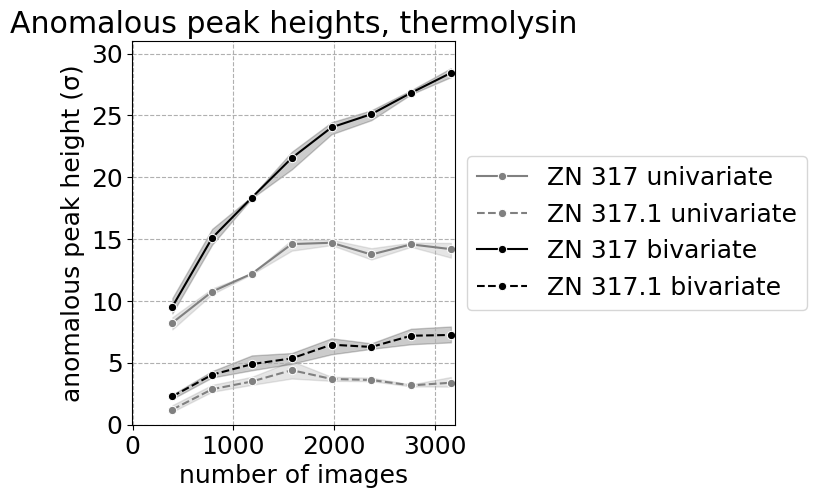

In [10]:
tmp=all_results_peak_heights.copy()
tmp=tmp.sort_values(by=["grid_id"])

n_atoms = 4
colors = plt.cm.viridis(np.linspace(0.3, 0.8, n_atoms))

fig,ax = plt.subplots(figsize=(8,5.7))
for rdw, group in tmp.groupby("rDW"):
    r_label = "bivariate" if rdw > 0 else "univariate"
    c = "k" if rdw > 0 else "gray"
    sns.lineplot(data=group, x="NF", y="ZN 317",ax=ax,
                 marker="o",linestyle="-", c=c,label=f"ZN 317 {r_label}")
    sns.lineplot(data=group, x="NF", y="ZN 317.1",ax=ax,
                 marker="o",linestyle="--", c=c,label=f"ZN 317.1 {r_label}")
    #plt.plot(group["NF"],group["ZN 317"],f'ko{dash}',label=f"ZN 317 {r_label}")
    #plt.plot(group["NF"],group["ZN 317.1"],f'o{dash}',c="gray",label=f"ZN 317.1 {r_label}")

    


plt.grid(linestyle='--')
plt.title("Anomalous peak heights, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("number of images")
plt.ylabel("anomalous peak height (σ)")
#plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303,0.606],labels=["0.9999","0.999","0.99","0.9","0","univariate", "CCTBX"])
#ax.set_yscale("log")
plt.ylim([-0.01,31])
plt.xlim([-1,3200])
ticks = ax.get_xticklabels()
for tick in ticks[-2:]:
    tick.set_rotation(45)
    tick.set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights_nframes.svg",bbox_inches="tight")
plt.show()

In [8]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights_W_dh.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights_W_dh.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_peak_heights_W_dh=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

In [9]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights_W_dh_d.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights_W_dh_d.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_peak_heights_W_dh_d=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

In [10]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('peak_heights_W_dh_e.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'peak_heights_W_dh_e.csv'))
#         print(tmp)
        try:
            print(dirpath)
#             for i in range(10):
#                 print(f"i: {i}, {dirpath.split('_')[-1*i]}")
            tmp_id=int(dirpath.split('_')[-1])
            job_id=int(dirpath.split('_')[-7]) # appropriate index may vary from run to run!
            seed=int(dirpath.split('_')[-6])   # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-1])
#             tmp_r=np.nan
        tmp["grid_id"]=tmp_id
        tmp["job_id"]=job_id
        tmp["seed"]=seed
#         print('----------')
#         print(dirpath)
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id},  seed: {seed}")
        results_list.append(tmp)
all_results_peak_heights_W_dh_e=pd.concat(results_list)

./careless_runs/merge_19756569_4597_mono_cl3_mc1_grid_4
Read-in values of grid_id: 4,  job_id: 19756569,  seed: 4597
./careless_runs/merge_19756572_25334_mono_cl3_mc1_grid_6
Read-in values of grid_id: 6,  job_id: 19756572,  seed: 25334
./careless_runs/merge_19756573_9373_mono_cl3_mc1_grid_7
Read-in values of grid_id: 7,  job_id: 19756573,  seed: 9373
./careless_runs/merge_19756568_26316_mono_cl3_mc1_grid_3
Read-in values of grid_id: 3,  job_id: 19756568,  seed: 26316
./careless_runs/merge_19756575_29062_mono_cl3_mc1_grid_9
Read-in values of grid_id: 9,  job_id: 19756575,  seed: 29062
./careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11
Read-in values of grid_id: 11,  job_id: 19756592,  seed: 3864
./careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2
Read-in values of grid_id: 2,  job_id: 19756567,  seed: 7468
./careless_runs/merge_19756574_4835_mono_cl3_mc1_grid_8
Read-in values of grid_id: 8,  job_id: 19756574,  seed: 4835
./careless_runs/merge_19756599_24962_mono_cl3_mc1_grid_1

In [11]:
all_params.reset_index(drop=True,inplace=True)
#all_params.info()
all_params.head(10)

,MLPL,IL,DMIN,ITER,SEED,DW_list,rDW,RU,STDOF,PEF,grid_id,job_id,seed
0,10,2,1.8,30000,4597,"None,0",0.50000,1,32.0,0,4,19756569,4597
1,10,2,1.8,30000,25334,"None,0",0.87500,1,32.0,0,6,19756572,25334
2,10,2,1.8,30000,9373,"None,0",0.93800,1,32.0,0,7,19756573,9373
3,10,2,1.8,30000,26316,"None,0",0.00000,1,32.0,0,3,19756568,26316
4,10,2,1.8,30000,29062,"None,0",0.98440,1,32.0,0,9,19756575,29062
5,10,2,1.8,30000,3864,"None,0",0.99610,1,32.0,0,11,19756592,3864
6,10,2,1.8,30000,7468,NaN,-1.00000,1,32.0,0,2,19756567,7468
7,10,2,1.8,30000,4835,"None,0",0.96900,1,32.0,0,8,19756574,4835
8,10,2,1.8,30000,24962,"None,0",0.99976,1,32.0,0,15,19756599,24962
9,10,2,1.8,30000,21755,"None,0",0.99990,1,32.0,0,16,19756566,21755


In [12]:
all_results_ccpred.head()

,Unnamed: 0,file,Resolution Range (Å),bin,test,Spacegroup,CCpred,grid_id,job_id,seed
0,0,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.874501,4,19756569,4597
1,1,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Test,P 61 2 2,0.857199,4,19756569,4597
2,2,thl_1p8A_grid_predictions_1.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.880116,4,19756569,4597
3,3,thl_1p8A_grid_predictions_1.mtz,34.35 - 1.80,0,Test,P 61 2 2,0.854651,4,19756569,4597
0,0,thl_1p8A_grid_predictions_0.mtz,34.35 - 1.80,0,Train,P 61 2 2,0.859448,6,19756572,25334


We clean each of the dataframes generated and then combine them together.

In [13]:
all_results_ccpred = pd.melt(all_results_ccpred, id_vars=['file', 'grid_id','job_id','Resolution Range (Å)','seed','test'], value_vars=['CCpred'])
all_results_ccpred.rename(columns={'value': 'CCpred'}, inplace=True)
pivoted_df = all_results_ccpred.pivot(index=['file', 'grid_id','job_id','Resolution Range (Å)','seed'], columns='test', values='CCpred')
pivoted_df.rename(columns={'Test': 'CCpred_test','Train': 'CCpred_train'}, inplace=True)
all_results_ccpred = pivoted_df.reset_index()

In [14]:
all_params.reset_index(drop=True,inplace=True)
all_results_ccpred.dropna(inplace=True)
all_results_ccpred["delay"] = [name[-5] for name in all_results_ccpred.file]
all_results_ccpred["delay"]=all_results_ccpred["delay"].astype('int32')
all_results_ccpred.sort_values(by=["grid_id","job_id"],inplace=True)
all_results_ccpred.reset_index(inplace=True)
print(all_results_ccpred.count())
all_results_ccpred.head()

test
index                   30
file                    30
grid_id                 30
job_id                  30
Resolution Range (Å)    30
seed                    30
CCpred_test             30
CCpred_train            30
delay                   30
dtype: int64


test,index,file,grid_id,job_id,Resolution Range (Å),seed,CCpred_test,CCpred_train,delay
0,0,thl_1p8A_grid_predictions_0.mtz,2,19756567,34.35 - 1.80,7468,0.855255,0.871691,0
1,15,thl_1p8A_grid_predictions_1.mtz,2,19756567,34.35 - 1.80,7468,0.869396,0.884305,1
2,1,thl_1p8A_grid_predictions_0.mtz,3,19756568,34.35 - 1.80,26316,0.796374,0.832508,0
3,16,thl_1p8A_grid_predictions_1.mtz,3,19756568,34.35 - 1.80,26316,0.843694,0.852566,1
4,2,thl_1p8A_grid_predictions_0.mtz,4,19756569,34.35 - 1.80,4597,0.857199,0.874501,0


### Clean `cchalf`,`ccanom`, and `peak heights` tables for merging

In [15]:
all_results_peak_heights = all_results_peak_heights.drop(columns=["job_id","seed"])

for i,peak_table in enumerate([all_results_peak_heights_W_dh, 
                   all_results_peak_heights_W_dh_d, 
                   all_results_peak_heights_W_dh_e]):
    try:
        peak_table.drop(columns=["job_id","seed","CA 318","CA 319","CA 320","CA 321"], 
                                   inplace=True)
    except:
        pass
    
    all_results_peak_heights = all_results_peak_heights.merge(peak_table, 
                                                              suffixes=("",f"_{i}"),
                                                              on="grid_id")
    
all_results = all_results_ccpred.merge(all_results_peak_heights,on="grid_id")

In [16]:
all_results_ccanom = all_results_ccanom[["CCanom","grid_id","seed","Spacegroup","bin"]]
all_results_ccanom = all_results_ccanom.groupby(by=["seed","Spacegroup","bin"]).mean().reset_index(drop=True)
all_results_ccanom["grid_id"]=all_results_ccanom["grid_id"].astype("int32")


In [17]:
#all_results_cchalf1 = all_results_cchalf.groupby(by=["seed","Spacegroup","bin"]).agg({'CChalf':['mean','std']}).reset_index(drop=True)
all_results_cchalf1 = all_results_cchalf[["CChalf","grid_id","seed","Spacegroup","bin"]]
all_results_cchalf1 = all_results_cchalf1.groupby(by=["seed","Spacegroup","bin"]).mean().reset_index(drop=True)
all_results_cchalf1["grid_id"]=all_results_cchalf1["grid_id"].astype("int32")


In [18]:
all_results = all_results.merge(all_results_ccanom,on="grid_id")
all_results = all_results.merge(all_results_cchalf1,on="grid_id")

In [19]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 30 non-null     int64  
 1   file                  30 non-null     object 
 2   grid_id               30 non-null     int64  
 3   job_id                30 non-null     int64  
 4   Resolution Range (Å)  30 non-null     object 
 5   seed                  30 non-null     int64  
 6   CCpred_test           30 non-null     float64
 7   CCpred_train          30 non-null     float64
 8   delay                 30 non-null     int32  
 9   ZN 317                30 non-null     float64
 10  CA 318                30 non-null     float64
 11  CA 319                30 non-null     float64
 12  CA 320                30 non-null     float64
 13  CA 321                30 non-null     float64
 14  ZN 317_0              30 non-null     float64
 15  ZN 317_1              30 

In [20]:
df_param=all_params[['IL','MLPL','ITER','STDOF','PEF','rDW','RU','grid_id','job_id','seed']].copy()

for ix, row in df_param.iterrows():
    grid_id=int(row["grid_id"])
    job_id =int(row["job_id"])
    for column in df_param.columns:
        all_results.loc[(all_results["grid_id"]==grid_id) & (all_results["job_id"]==job_id), column] =\
        df_param.loc[(df_param["grid_id"]==grid_id) & (df_param["job_id"]==job_id),column].to_numpy()[0]

all_results=all_results.infer_objects()
all_results=all_results.sort_values(by=["grid_id"])

tmp=all_results.loc[(all_results["delay"]>-1),\
                      ["delay","CCpred_train","CCpred_test","ZN 317","CA 318","CA 319","CA 320","CA 321",
                       "ZN 317_1", "ZN 317_2","ZN 317_0","CCanom", "CChalf",
                       "grid_id","job_id","IL","MLPL","ITER","STDOF","PEF","rDW","RU"]].groupby(\
                      ["job_id","IL","MLPL","ITER","STDOF","PEF","rDW","RU"]).mean().reset_index().sort_values(by=["rDW"])
all_results_avg=tmp

# all_results_avg.set_index("grid_id",inplace=True)
#all_results_avg.style.background_gradient()
all_results_avg

,job_id,IL,MLPL,ITER,STDOF,PEF,rDW,RU,delay,CCpred_train,...,CA 318,CA 319,CA 320,CA 321,ZN 317_1,ZN 317_2,ZN 317_0,CCanom,CChalf,grid_id
1,19756567,2.0,10.0,30000.0,32.0,0.0,-1.00000,1.0,0.5,0.877998,...,5.152,2.346,4.508,2.049,22.322,23.761,23.841,0.121589,0.870986,2.0
2,19756568,2.0,10.0,30000.0,32.0,0.0,0.00000,1.0,0.5,0.842537,...,4.484,2.031,5.868,2.820,22.948,24.090,24.279,0.117449,0.869578,3.0
3,19756569,2.0,10.0,30000.0,32.0,0.0,0.50000,1.0,0.5,0.877308,...,4.604,3.438,5.728,2.941,23.188,24.549,24.769,0.121289,0.883372,4.0
4,19756571,2.0,10.0,30000.0,32.0,0.0,0.75000,1.0,0.5,0.875401,...,6.075,3.057,5.294,3.150,25.180,25.628,26.177,0.108736,0.892805,5.0
5,19756572,2.0,10.0,30000.0,32.0,0.0,0.87500,1.0,0.5,0.868634,...,6.798,3.429,5.229,2.973,24.914,25.135,25.800,0.127545,0.901746,6.0
6,19756573,2.0,10.0,30000.0,32.0,0.0,0.93800,1.0,0.5,0.878675,...,6.700,3.999,7.793,4.455,27.427,26.917,27.868,0.111246,0.909559,7.0
7,19756574,2.0,10.0,30000.0,32.0,0.0,0.96900,1.0,0.5,0.872710,...,7.420,3.989,7.127,3.964,27.523,26.732,27.883,0.127990,0.918598,8.0
8,19756575,2.0,10.0,30000.0,32.0,0.0,0.98440,1.0,0.5,0.853584,...,7.157,4.484,7.789,6.036,28.140,27.333,28.288,0.137743,0.922351,9.0
9,19756576,2.0,10.0,30000.0,32.0,0.0,0.99220,1.0,0.5,0.876949,...,7.073,4.735,8.548,5.887,28.797,27.798,28.785,0.127505,0.918739,10.0
10,19756592,2.0,10.0,30000.0,32.0,0.0,0.99610,1.0,0.5,0.877267,...,7.805,5.156,8.553,6.796,29.112,28.067,29.085,0.140073,0.922696,11.0


In [21]:
## add the peak heights obtained from CCTBX (see Dalton et al. 2022)

all_results_avg.loc[15, "ZN 317"] = 20.07
all_results_avg.loc[15, "CA 318"] = 6.17
all_results_avg.loc[15, "CA 319"] = 3.81
all_results_avg.loc[15, "CA 320"] = 7.05
all_results_avg.loc[15, "CA 321"] = 7.25
all_results_avg.loc[15, "rDW"] = -3

all_results_avg

,job_id,IL,MLPL,ITER,STDOF,PEF,rDW,RU,delay,CCpred_train,...,CA 318,CA 319,CA 320,CA 321,ZN 317_1,ZN 317_2,ZN 317_0,CCanom,CChalf,grid_id
1,19756567.0,2.0,10.0,30000.0,32.0,0.0,-1.00000,1.0,0.5,0.877998,...,5.152,2.346,4.508,2.049,22.322,23.761,23.841,0.121589,0.870986,2.0
2,19756568.0,2.0,10.0,30000.0,32.0,0.0,0.00000,1.0,0.5,0.842537,...,4.484,2.031,5.868,2.820,22.948,24.090,24.279,0.117449,0.869578,3.0
3,19756569.0,2.0,10.0,30000.0,32.0,0.0,0.50000,1.0,0.5,0.877308,...,4.604,3.438,5.728,2.941,23.188,24.549,24.769,0.121289,0.883372,4.0
4,19756571.0,2.0,10.0,30000.0,32.0,0.0,0.75000,1.0,0.5,0.875401,...,6.075,3.057,5.294,3.150,25.180,25.628,26.177,0.108736,0.892805,5.0
5,19756572.0,2.0,10.0,30000.0,32.0,0.0,0.87500,1.0,0.5,0.868634,...,6.798,3.429,5.229,2.973,24.914,25.135,25.800,0.127545,0.901746,6.0
6,19756573.0,2.0,10.0,30000.0,32.0,0.0,0.93800,1.0,0.5,0.878675,...,6.700,3.999,7.793,4.455,27.427,26.917,27.868,0.111246,0.909559,7.0
7,19756574.0,2.0,10.0,30000.0,32.0,0.0,0.96900,1.0,0.5,0.872710,...,7.420,3.989,7.127,3.964,27.523,26.732,27.883,0.127990,0.918598,8.0
8,19756575.0,2.0,10.0,30000.0,32.0,0.0,0.98440,1.0,0.5,0.853584,...,7.157,4.484,7.789,6.036,28.140,27.333,28.288,0.137743,0.922351,9.0
9,19756576.0,2.0,10.0,30000.0,32.0,0.0,0.99220,1.0,0.5,0.876949,...,7.073,4.735,8.548,5.887,28.797,27.798,28.785,0.127505,0.918739,10.0
10,19756592.0,2.0,10.0,30000.0,32.0,0.0,0.99610,1.0,0.5,0.877267,...,7.805,5.156,8.553,6.796,29.112,28.067,29.085,0.140073,0.922696,11.0


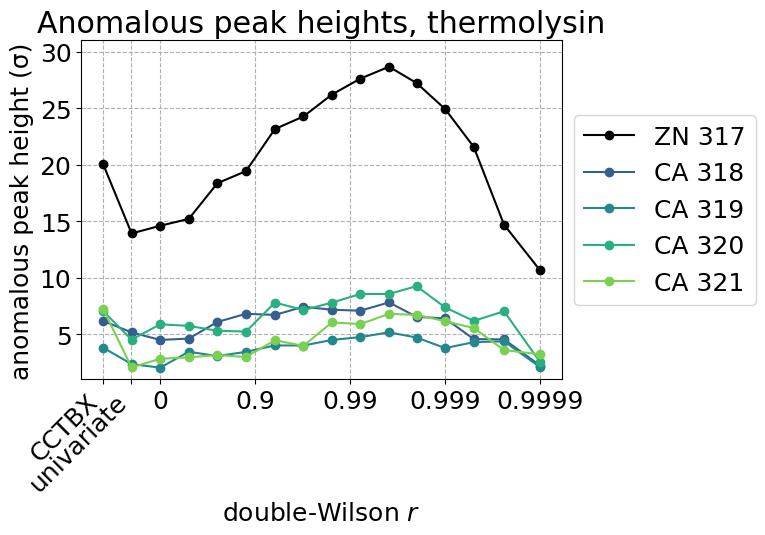

In [22]:
tmp=all_results_avg.copy()
tmp=tmp.sort_values(by=["rDW"])

n_atoms = 4
colors = plt.cm.viridis(np.linspace(0.3, 0.8, n_atoms))

fig,ax = plt.subplots(figsize=(8,5.7))
for atom in ["ZN 317"]:
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'ko-',label=f"{atom}")
for n,atom in enumerate(["CA 318","CA 319","CA 320","CA 321"]):
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'o-',color=colors[n],label=f"{atom}")
    


plt.grid(linestyle='--')
plt.title("Anomalous peak heights, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("anomalous peak height (σ)")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303,0.606],labels=["0.9999","0.999","0.99","0.9","0","univariate", "CCTBX"])
#ax.set_yscale("log")
plt.ylim([1,31])
ticks = ax.get_xticklabels()
for tick in ticks[-2:]:
    tick.set_rotation(45)
    tick.set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights.svg",bbox_inches="tight")
plt.show()

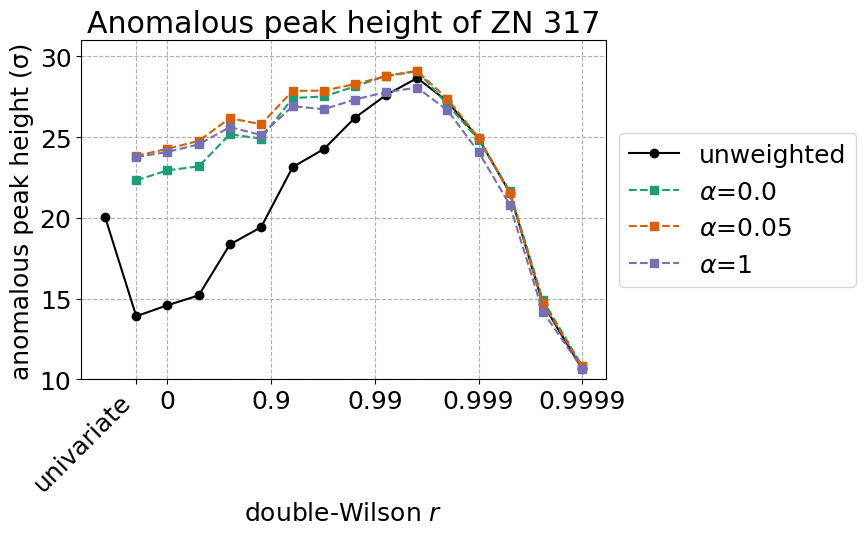

In [23]:
tmp=all_results_avg.copy()
tmp=tmp.sort_values(by=["rDW"])

n_atoms = 4
cbrewer_colors=["#1b9e77","#d95f02","#7570b3"]
alphas= [0.0,0.05,1]
fig,ax = plt.subplots(figsize=(9,5.7))
for atom in ["ZN 317"]:
    plt.plot(np.log10(1-tmp["rDW"]),tmp[atom],'ko-',label="unweighted")
for i,atom in enumerate(["ZN 317_1","ZN 317_0","ZN 317_2"]):
    plt.plot(np.log10(1-tmp["rDW"]),
             tmp[atom],
             's--',
             color=cbrewer_colors[i],
             label=r"$\alpha$="+str(alphas[i]))


plt.grid(linestyle='--')
plt.title("Anomalous peak height of ZN 317")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("anomalous peak height (σ)")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([10,31])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("peak heights-weighting.svg",bbox_inches="tight")
plt.show()

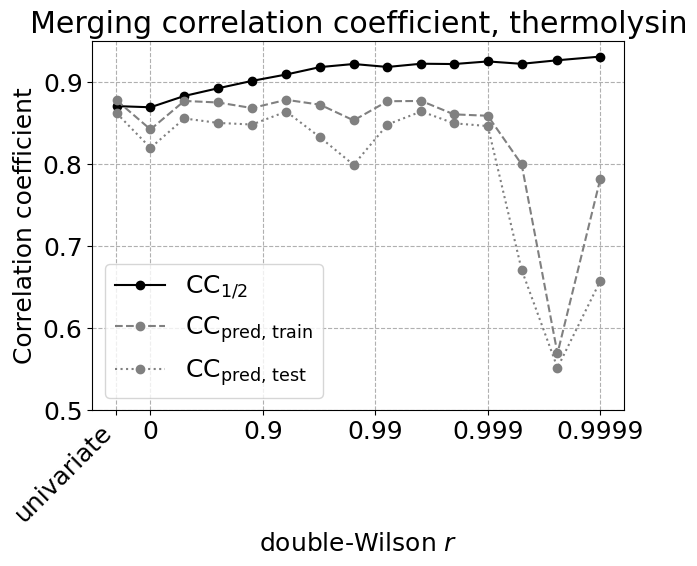

In [26]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["CChalf"],'ko-',label=r"CC$_\text{1/2}$")
plt.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_train"],'o--',color="gray",label=r"CC$_\text{pred, train}$")
plt.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_test"],'o:',color="gray",label=r"CC$_\text{pred, test}$")

plt.grid(linestyle="--")
plt.title("Merging correlation coefficient, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0.5,0.95])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig("CCs.svg",bbox_inches="tight")
plt.show()

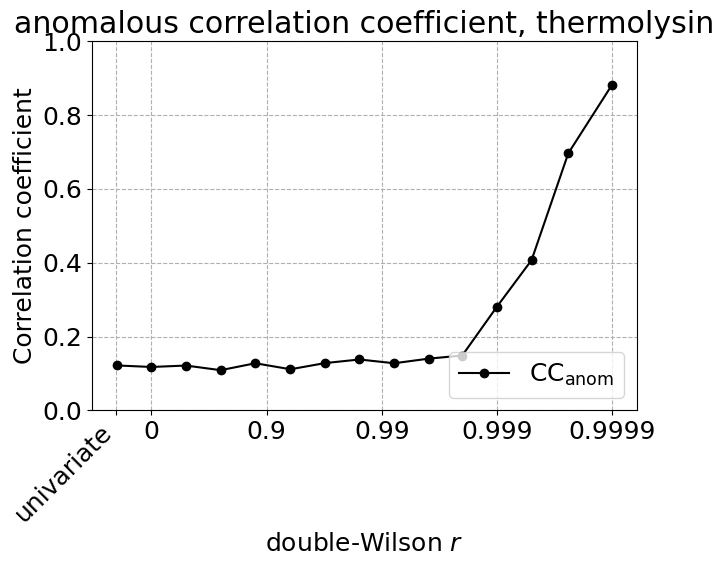

In [27]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["CCanom"],'ko-',label=r"CC$_\text{anom}$")

plt.grid(linestyle="--")
plt.title("anomalous correlation coefficient, thermolysin")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0,1])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("CCanom.svg",bbox_inches="tight")
plt.show()

In [39]:
%%bash 

mkdir ./pymol
cd pymol
cp -r ../careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11/run_refinement/2tli_refine_001.pdb ./2tli_refine_001.pdb
cp -r ../careless_runs/merge_19756592_3864_mono_cl3_mc1_grid_11/run_omit_1/2tli_occ0_ions_refine_001.mtz omit_11.mtz
cp -r ../careless_runs/merge_19756567_7468_mono_cl3_mc1_grid_2/run_omit_1/2tli_occ0_ions_refine_001.mtz omit_2.mtz